In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

In [ ]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [ ]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy']) # added accuracy as a metric for model
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 2s 5ms/step - loss: 0.6944 - accuracy: 3.6667e-04 - val_loss: 0.6943 - val_accuracy: 4.0000e-04
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6942 - accuracy: 3.3333e-04 - val_loss: 0.6941 - val_accuracy: 4.0000e-04
Epoch 3/5
235/235 [==============================] - 1s 4ms/step - loss: 0.6941 - accuracy: 3.5000e-04 - val_loss: 0.6940 - val_accuracy: 5.0000e-04
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6939 - accuracy: 3.6667e-04 - val_loss: 0.6938 - val_accuracy: 4.0000e-04
Epoch 5/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6937 - accuracy: 3.8333e-04 - val_loss: 0.6937 - val_accuracy: 3.0000e-04


In [ ]:
print(history.history['accuracy'])
print(history.history['val_accuracy'])

[0.000366666674381122, 0.00033333332976326346, 0.0003499999875202775, 0.000366666674381122, 0.00038333333213813603]
[0.00039999998989515007, 0.00039999998989515007, 0.0005000000237487257, 0.00039999998989515007, 0.0003000000142492354]


# Question 1: Added one more hidden layer to encoder



In [ ]:
# Add one more hidden layer to autoencoder
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# Adding one more hidden layer to autoencoder
encoded = Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

history = autoencoder.fit(x_train, x_train,
                epochs=5,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/5
235/235 [==============================] - 2s 6ms/step - loss: 0.6940 - accuracy: 6.1667e-04 - val_loss: 0.6940 - val_accuracy: 6.0000e-04
Epoch 2/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6939 - accuracy: 6.1667e-04 - val_loss: 0.6938 - val_accuracy: 7.0000e-04
Epoch 3/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6937 - accuracy: 6.5000e-04 - val_loss: 0.6937 - val_accuracy: 7.0000e-04
Epoch 4/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6936 - accuracy: 6.8333e-04 - val_loss: 0.6935 - val_accuracy: 7.0000e-04
Epoch 5/5
235/235 [==============================] - 1s 5ms/step - loss: 0.6935 - accuracy: 7.5000e-04 - val_loss: 0.6934 - val_accuracy: 7.0000e-04


# Question 2:

### prediction of images and visualizing the x_test and predicted images

In [ ]:
decoded_imgs = autoencoder.predict(x_test) # predicted images based on x_test data

313/313 [==============================] - 1s 1ms/step


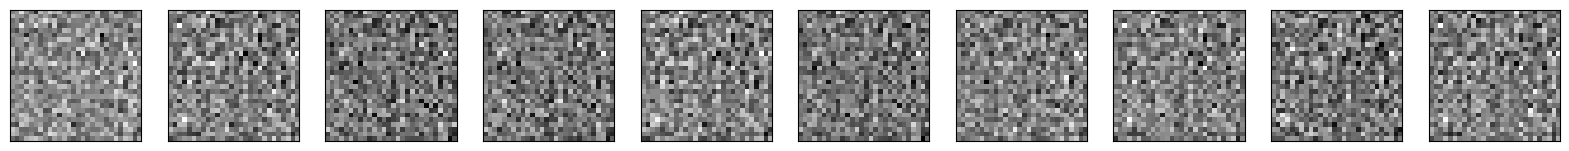

In [ ]:
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display predicted image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

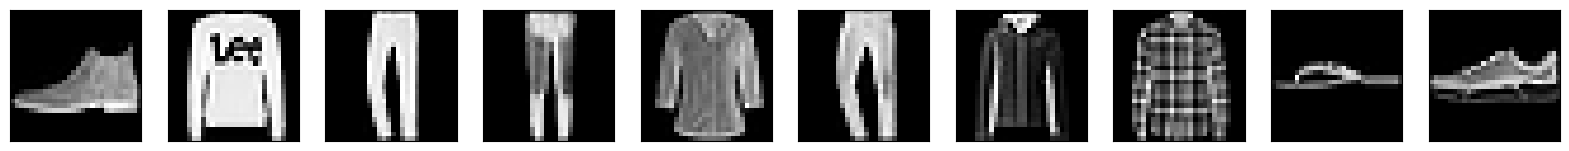

In [ ]:
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Question 4:

### visualize training data loss vs validation data loss and trianing accuracy vs validation accuracy

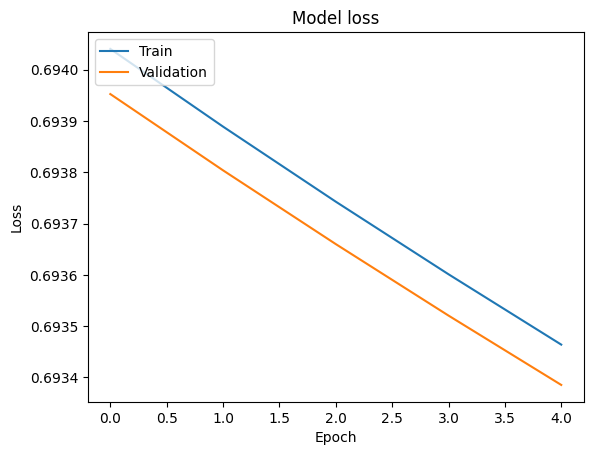

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
print(history.history['accuracy'])
print(history.history['val_accuracy'])

[0.0006166666862554848, 0.0006166666862554848, 0.0006500000017695129, 0.000683333317283541, 0.000750000006519258]
[0.0006000000284984708, 0.000699999975040555, 0.000699999975040555, 0.000699999975040555, 0.000699999975040555]


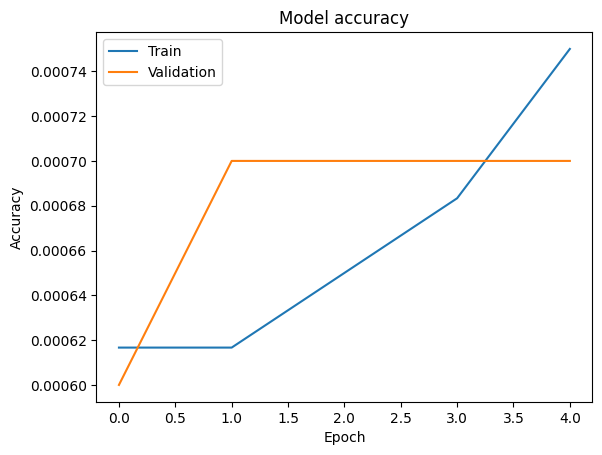

In [ ]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()